In [27]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
# name of the input file
#imname = 'C:\Users\chris\Desktop\cs180\ChristopherDuroiu.github.io\proj1\cs180 proj1 data\cathedral.jpg'
imname = 'cs180 proj1 data\cathedral.jpg'

im = skio.imread(imname)

In [28]:
im = sk.img_as_float(im)

In [29]:
def graph(r_channel, g_channel, b_channel):
    rgb_image = np.dstack((r_channel, g_channel, b_channel))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

In [58]:
def partition_image(image_path, black_prop=0.04):
    image = skio.imread(image_path)
    image = sk.img_as_float(image)

    glob_col_start_ind = 0
    glob_col_end_ind = 1 << 30
    
    for row_ind in range(image.shape[0])[30:-30]:
        col_ind = 0
        while image[row_ind][col_ind] > 0.5:
            col_ind += 1
        glob_col_start_ind = max(glob_col_start_ind, col_ind)

    for row_ind in range(image.shape[0])[30:-30]:
        col_ind = image.shape[1] - 1
        while image[row_ind][col_ind] > 0.5:
            col_ind -= 1
        glob_col_end_ind = min(glob_col_end_ind, col_ind)

    glob_row_start_ind = 0
    glob_row_end_ind = 1 << 30

    for col_ind in range(image.shape[1])[30:-30]:
        row_ind = 0
        while image[row_ind][col_ind] > 0.5:
            row_ind += 1
       # print(row_ind)
        glob_row_start_ind = max(glob_row_start_ind, row_ind)

    for col_ind in range(image.shape[1])[30:-30]:
        row_ind = image.shape[0] - 1
        while image[row_ind][col_ind] > 0.5:
            row_ind -= 1
        glob_row_end_ind = min(glob_row_end_ind, row_ind)
   
    print(glob_col_start_ind, glob_col_end_ind, glob_row_start_ind, glob_row_end_ind)
    cropped_im = image[glob_row_start_ind:glob_row_end_ind, glob_col_start_ind:glob_col_end_ind]
    
    height = np.floor(cropped_im.shape[0] / 3.0).astype(int)
    b = cropped_im[:height]
    g = cropped_im[height: 2*height]
    r = cropped_im[2*height: 3*height]

    buff = int(b.shape[1] * black_prop)
    print(buff)
    #buff = 12
   # print(buff)
    #c_buff = b.shape[1] * black_prop
    
    b = b[buff:-buff, buff:-buff]
    g = g[buff:-buff, buff:-buff]
    r = r[buff:-buff, buff:-buff]
    graph(r, g, b)
    return r, g, b

11 381 9 1012
14


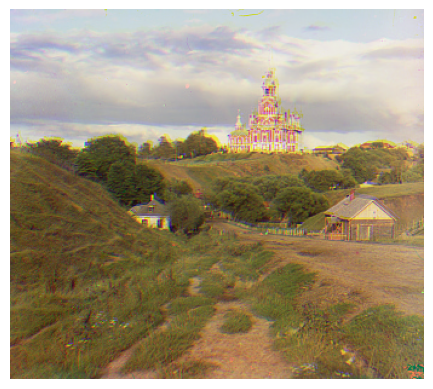

In [59]:
r, g, b = partition_image(imname)

In [61]:
def realign(base_channel, add_channel):
    min_diff = 1 << 30
    best_dr, best_dc = None, None
    
    for off_y in range(-15, 16):
        for off_x in range(-15, 16):
            curr_sum = 0
            for row in range(15, base_channel.shape[0] - 15):
                for col in range(15, base_channel.shape[1] - 15):
                    curr_sum += (add_channel[off_y + row][off_x + col] - base_channel[row][col]) ** 2

            if curr_sum < min_diff:
                best_dr, best_dc = off_y, off_x
                min_diff = curr_sum

    return np.roll(add_channel, (-best_dr, -best_dc), axis=(0, 1))

In [55]:
roll_g = realign(b, g)
roll_r = realign(b, r)

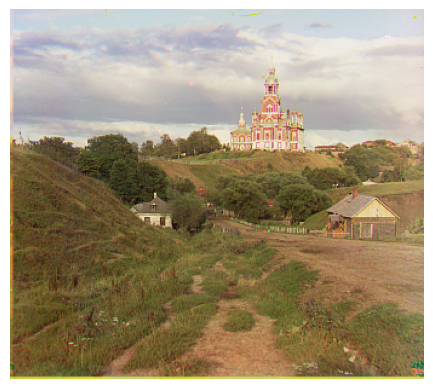

In [60]:
graph(roll_r, roll_g, b)